In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import ast
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
parquet_file = 'C:/Users/jjccyy9741/OneDrive - postech.ac.kr/바탕 화면/LG/데이터/postech_company_project.parquet'
# Parquet 파일 열기
table = pq.read_table(parquet_file)

# Table에서 데이터를 DataFrame으로 변환
data = table.to_pandas()
print(data.shape)

(13881284, 71)


In [3]:
"""data = data[['MONTH_YYYYMM', 'RECLAIM_PERIOD',
       'SUBSIDIARY_NAME', 'CAPTIVE_CHANNEL_FLAG', 'COMPANY_CODE',
       'DIVISION_NAME', 'MODEL_CODE', 'PARTS_NO1', 'PARTS_NO2', 'PARTS_NO3',
       'PARTS_NO4', 'PARTS_NO5', 'RECEIPT_SYMPTOM','CENTER_CODE', 
       'PREV_CENTER_CODE', 'PRODUCT_NAME','RECLAIM', 'WARRANTY_TYPE', 'PREV_WARRANTY_TYPE',
       'SVC_TYPE', 'PREV_SVC_TYPE', 'ENGINEER_CODE', 'PREV_ENGINEER_CODE','ENGINEER_REPAIR', 'PREV_ENGINEER_SYMPTOM','MULTICLAIM','PREV_RECEIPT_SYMPTOM']]

print(data.shape)"""

"data = data[['MONTH_YYYYMM', 'RECLAIM_PERIOD',\n       'SUBSIDIARY_NAME', 'CAPTIVE_CHANNEL_FLAG', 'COMPANY_CODE',\n       'DIVISION_NAME', 'MODEL_CODE', 'PARTS_NO1', 'PARTS_NO2', 'PARTS_NO3',\n       'PARTS_NO4', 'PARTS_NO5', 'RECEIPT_SYMPTOM','CENTER_CODE', \n       'PREV_CENTER_CODE', 'PRODUCT_NAME','RECLAIM', 'WARRANTY_TYPE', 'PREV_WARRANTY_TYPE',\n       'SVC_TYPE', 'PREV_SVC_TYPE', 'ENGINEER_CODE', 'PREV_ENGINEER_CODE','ENGINEER_REPAIR', 'PREV_ENGINEER_SYMPTOM','MULTICLAIM','PREV_RECEIPT_SYMPTOM']]\n\nprint(data.shape)"

# REPAIR_PERIOD 컬럼 생성

In [4]:
data[['REPAIR_START_DATE','REPAIR_END_DATE']]

,REPAIR_START_DATE,REPAIR_END_DATE
0,20211214,20220120
1,20220104,20220104
2,20220114,20220124
3,20220111,20220112
4,20220118,20220118
...,...,...
14196328,20230620,20230620
14196329,20230526,20230526
14196330,20230524,20230524
14196331,20230608,20230608


In [5]:
# 'REPAIR_START_DATE' 및 'REPAIR_END_DATE'를 datetime 형식으로 변환
data['REPAIR_START_DATE'] = pd.to_datetime(data['REPAIR_START_DATE'], format='%Y%m%d')
data['REPAIR_END_DATE'] = pd.to_datetime(data['REPAIR_END_DATE'], format='%Y%m%d')

# 'REPAIR_PERIOD' 컬럼 추가
data['REPAIR_PERIOD'] = (data['REPAIR_END_DATE'] - data['REPAIR_START_DATE']).dt.days

In [6]:
data['RECLAIM_PERIOD'].describe()

count    497539.000000
mean         29.334271
std          30.467094
min         -89.000000
25%           5.000000
50%          25.000000
75%          54.000000
max          89.000000
Name: RECLAIM_PERIOD, dtype: float64

In [7]:
df = data.copy()

In [8]:
df.shape

(13881284, 72)

In [9]:
df = df[df['REPAIR_PERIOD'] >= 0]
df.shape


(13881276, 72)

In [10]:
df[['REPAIR_START_DATE','REPAIR_END_DATE','REPAIR_PERIOD']]

,REPAIR_START_DATE,REPAIR_END_DATE,REPAIR_PERIOD
0,2021-12-14,2022-01-20,37
1,2022-01-04,2022-01-04,0
2,2022-01-14,2022-01-24,10
3,2022-01-11,2022-01-12,1
4,2022-01-18,2022-01-18,0
...,...,...,...
14196328,2023-06-20,2023-06-20,0
14196329,2023-05-26,2023-05-26,0
14196330,2023-05-24,2023-05-24,0
14196331,2023-06-08,2023-06-08,0


In [11]:
df['REPAIR_PERIOD'].describe()

count    1.388128e+07
mean     2.743618e-01
std      2.944712e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.720000e+02
Name: REPAIR_PERIOD, dtype: float64

In [12]:
df['REPAIR_PERIOD'].value_counts()

REPAIR_PERIOD
0      13411149
1        142158
2         55141
3         36496
4         27682
         ...   
265           1
330           1
391           1
310           1
339           1
Name: count, Length: 327, dtype: int64

# 컬럼별 결측률 확인

In [13]:
# 결측률을 계산하는 함수
def calculate_missing_rate(column):
    return column.isnull().mean() * 100  # 결측값의 비율을 백분율로 계산

# 각 컬럼별 결측률 계산
missing_rate_df = df.apply(calculate_missing_rate)

# 결과 출력
display(pd.DataFrame(missing_rate_df).head(30))
pd.DataFrame(missing_rate_df).head(30).describe()

,0
YEAR_YYYY,0.000000
MONTH_YYYYMM,0.000000
WEEK_YYYYWWW,0.000000
RECLAIM_PERIOD,96.415769
SUBSIDIARY_NAME,0.000000
CAPTIVE_CHANNEL_FLAG,0.000000
COMPANY_CODE,0.000000
DIVISION_NAME,0.000000
MODEL_CODE,0.000000
PARTS_NO1,63.568479


,0
count,30.000000
mean,66.628937
std,44.790196
min,0.000000
25%,1.602619
50%,96.948631
75%,99.447016
max,99.951474


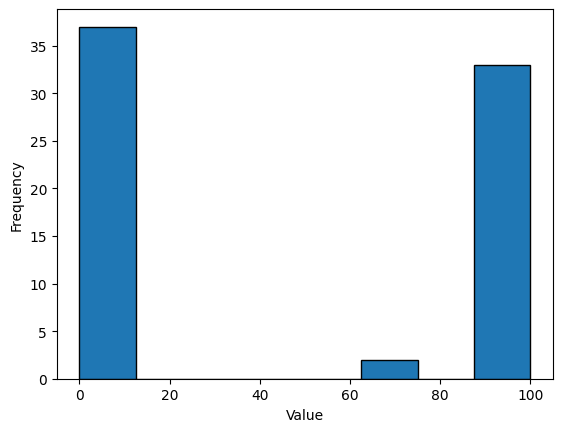

In [14]:
# 'a' 컬럼의 히스토그램 시각화
plt.hist(pd.DataFrame(missing_rate_df)[0], bins='auto', edgecolor='black')  # 'auto'로 bins를 자동으로 조절
#plt.title('Histogram of Column "a"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 재서비스 관련 EDA

In [15]:
# 재서비스 개수
print(len(df[df['RECLAIM']==1])/len(df))
df[df['RECLAIM']==1]

0.03111010832145402


,YEAR_YYYY,MONTH_YYYYMM,WEEK_YYYYWWW,RECLAIM_PERIOD,SUBSIDIARY_NAME,CAPTIVE_CHANNEL_FLAG,COMPANY_CODE,DIVISION_NAME,MODEL_CODE,PARTS_NO1,...,KEY_PARTS_REMARK4,KEY_PARTS_REMARK5,PREV_KEY_PARTS_REMARK1,PREV_KEY_PARTS_REMARK2,PREV_KEY_PARTS_REMARK3,PREV_KEY_PARTS_REMARK4,PREV_KEY_PARTS_REMARK5,MULTICLAIM,PREV_RECEIPT_SYMPTOM,REPAIR_PERIOD
0,2022,202201,2022W05,47.0,LGEAI,Non Captive,HE,LTV,OLED65C7P,LGE_PARTS_993,...,None,None,None,None,None,None,None,2,Power,37
1,2022,202201,2022W03,10.0,LGEAI,Non Captive,HE,LTV,65UN6955ZUF,LGE_PARTS_4492,...,None,None,Main,None,None,None,None,2,Audio,0
2,2022,202201,2022W05,30.0,LGEAI,Non Captive,HE,LTV,50UN7300AUD,LGE_PARTS_15608,...,None,None,Main,None,None,None,None,2,Power,10
3,2022,202201,2022W02,39.0,LGEAI,Non Captive,HE,LTV,70UP7070PUE,LGE_PARTS_9199,...,None,None,Power,Main,None,None,None,2,Power,1
4,2022,202201,2022W03,5.0,LGEAI,Non Captive,HE,LTV,OLED77CXAUA,LGE_PARTS_15413,...,None,None,None,None,None,None,None,2,Power,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196135,2023,202306,2023W25,23.0,LGEIL,Captive,HA,W/M,FHV1409ZWP,LGE_PARTS_16120,...,None,None,None,None,None,None,None,2,Power Issues,0
14196199,2023,202306,2023W23,-86.0,LGEIL,Non Captive,HA,RAC DIVISION,PW-Q12WUZA,None,...,None,None,None,None,None,None,None,2,None,0
14196218,2023,202306,2023W22,60.0,LGEIL,Non Captive,HE,LTV,43LM5620PTA,LGE_PARTS_27082,...,None,None,None,None,None,None,None,2,How to: Installation and Settings,0
14196273,2023,202306,2023W24,74.0,LGEIL,Captive,HE,LTV,43UQ7550PSF,LGE_PARTS_27082,...,None,None,None,None,None,None,None,2,How to: Installation and Settings,0


In [16]:
# 현재 전수 증상과 이전 접수증상 분석
print(len(df[df['RECEIPT_SYMPTOM']==df['PREV_RECEIPT_SYMPTOM']])/len(df))
print(len(df[df['RECEIPT_SYMPTOM']==df['PREV_RECEIPT_SYMPTOM']])/len(df[df['RECLAIM']==1]))
df[df['RECEIPT_SYMPTOM']==df['PREV_RECEIPT_SYMPTOM']]

0.0120288653579109
0.3866545636427632


,YEAR_YYYY,MONTH_YYYYMM,WEEK_YYYYWWW,RECLAIM_PERIOD,SUBSIDIARY_NAME,CAPTIVE_CHANNEL_FLAG,COMPANY_CODE,DIVISION_NAME,MODEL_CODE,PARTS_NO1,...,KEY_PARTS_REMARK4,KEY_PARTS_REMARK5,PREV_KEY_PARTS_REMARK1,PREV_KEY_PARTS_REMARK2,PREV_KEY_PARTS_REMARK3,PREV_KEY_PARTS_REMARK4,PREV_KEY_PARTS_REMARK5,MULTICLAIM,PREV_RECEIPT_SYMPTOM,REPAIR_PERIOD
2,2022,202201,2022W05,30.0,LGEAI,Non Captive,HE,LTV,50UN7300AUD,LGE_PARTS_15608,...,None,None,Main,None,None,None,None,2,Power,10
6,2022,202201,2022W04,41.0,LGEAI,Non Captive,HE,LTV,55UN7300AUD,LGE_PARTS_5204,...,None,None,Main,None,None,None,None,2,Network,0
8,2022,202201,2022W03,8.0,LGEAI,Non Captive,HE,LTV,55UN7000PUB,LGE_PARTS_17357,...,None,None,LED Array,None,None,None,None,2,Video,3
9,2022,202201,2022W02,6.0,LGEAI,Non Captive,HE,LTV,OLED55CXPUA,LGE_PARTS_14364,...,None,None,None,None,None,None,None,2,Power,4
10,2022,202201,2022W04,22.0,LGEAI,Non Captive,HE,LTV,OLED55CXPUA,LGE_PARTS_20646,...,None,None,None,None,None,None,None,2,Power,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14195787,2023,202306,2023W26,-4.0,LGEIL,Non Captive,HA,RAC DIVISION,PS-Q19JNXE,None,...,None,None,None,None,None,None,None,1,Specification,0
14195823,2023,202306,2023W22,20.0,LGEIL,Captive,HA,W/M,FHD2112STB,LGE_PARTS_7352,...,None,None,None,None,None,None,None,2,Water/Suds Issues,0
14196218,2023,202306,2023W22,60.0,LGEIL,Non Captive,HE,LTV,43LM5620PTA,LGE_PARTS_27082,...,None,None,None,None,None,None,None,2,How to: Installation and Settings,0
14196273,2023,202306,2023W24,74.0,LGEIL,Captive,HE,LTV,43UQ7550PSF,LGE_PARTS_27082,...,None,None,None,None,None,None,None,2,How to: Installation and Settings,0


In [17]:
df['SVC_TYPE'].value_counts()

SVC_TYPE
IS    6424716
IH    3663956
MS    3625946
CI      74542
PD      62296
CD      21311
DI       8393
ID        116
Name: count, dtype: int64

In [18]:
df['WARRANTY_TYPE'].value_counts()


WARRANTY_TYPE
IW        9825457
OW        3367580
EW         264424
P          154439
EP         114815
OZ          81053
EM          52205
IG          20094
OG           1204
<NULL>          5
Name: count, dtype: int64

In [19]:
df['SUBSIDIARY_NAME'].value_counts()


SUBSIDIARY_NAME
LGEIL    12784922
LGEAI     1096354
Name: count, dtype: int64

# 미국 인도 비교

In [20]:
df.shape

(13881276, 72)

In [21]:
reserv_df = df[df['RECLAIM']==1]

In [22]:
print('df size:',df.shape)
print('reserv_df size:',reserv_df.shape)

df size: (13881276, 72)
reserv_df size: (431848, 72)


In [23]:
usa_df = reserv_df[reserv_df['SUBSIDIARY_NAME'] == 'LGEAI']
india_df = reserv_df[reserv_df['SUBSIDIARY_NAME'] == 'LGEIL']

## 재서비스율 비교

In [24]:
print('미국 재서비스율')
print(len(usa_df)/len(df[df['SUBSIDIARY_NAME']=='LGEAI']))

print('인도 재서비스율')
print(len(india_df)/len(df[df['SUBSIDIARY_NAME']=='LGEIL']))

미국 재서비스율
0.08651858797432216
인도 재서비스율
0.026358627764799816


## 수리기간 비교

In [25]:

display(usa_df['REPAIR_PERIOD'].describe())
print('********************************************')

display(india_df['REPAIR_PERIOD'].describe())

count    94855.000000
mean         3.320500
std         10.422573
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        300.000000
Name: REPAIR_PERIOD, dtype: float64

********************************************


count    336993.000000
mean          0.228064
std           1.733933
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         135.000000
Name: REPAIR_PERIOD, dtype: float64

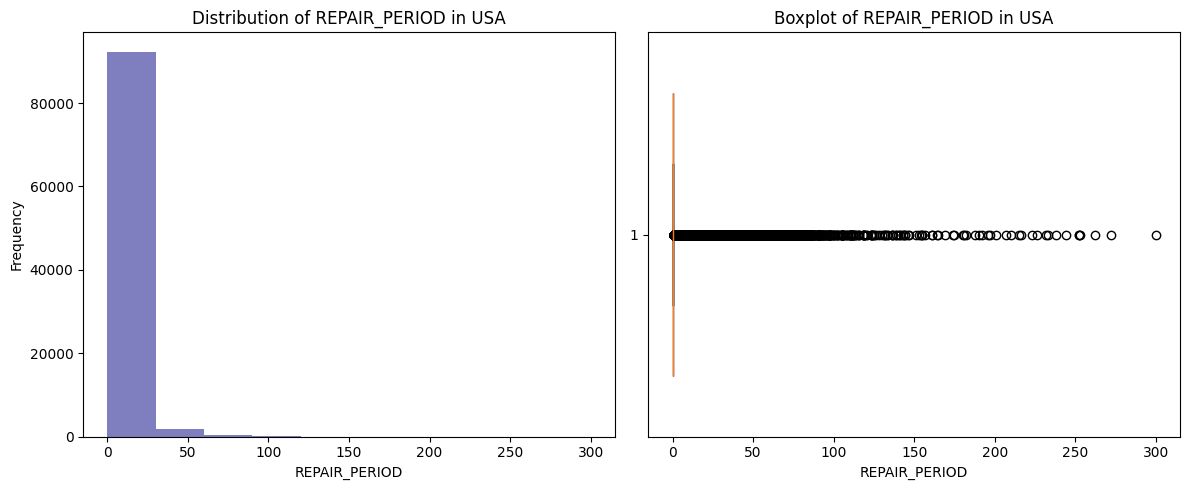

In [26]:
# Figure 및 Axes 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 서브플롯: 히스토그램
axes[0].hist(usa_df['REPAIR_PERIOD'], bins=10, alpha=0.5, color='navy')
axes[0].set_title('Distribution of REPAIR_PERIOD in USA')
axes[0].set_xlabel('REPAIR_PERIOD')
axes[0].set_ylabel('Frequency')

# 두 번째 서브플롯: 박스플롯
axes[1].boxplot(usa_df['REPAIR_PERIOD'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='navy', color='navy'))
axes[1].set_title('Boxplot of REPAIR_PERIOD in USA')
axes[1].set_xlabel('REPAIR_PERIOD')

# 서브플롯 간의 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

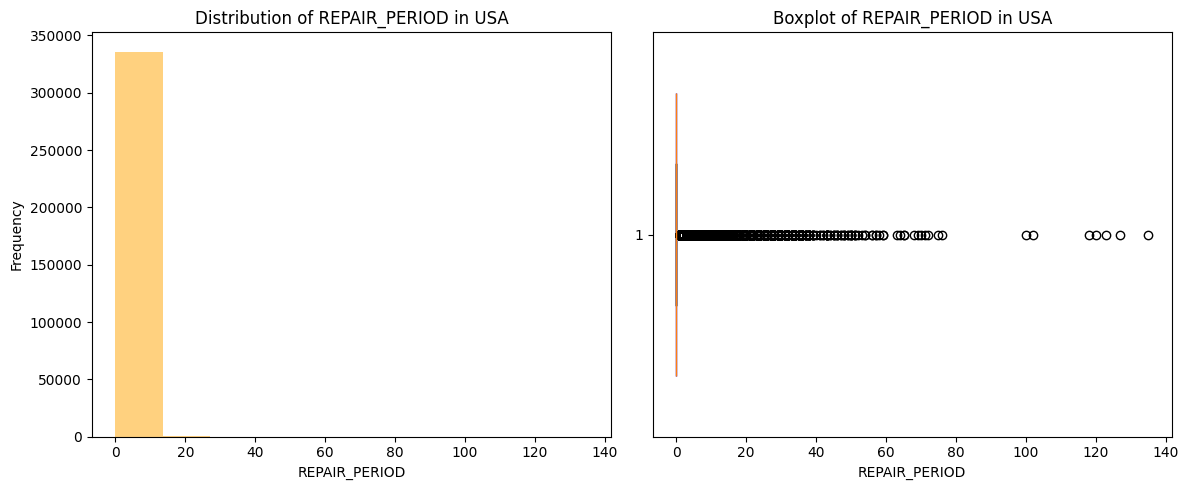

In [27]:
# Figure 및 Axes 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 서브플롯: 히스토그램
axes[0].hist(india_df['REPAIR_PERIOD'], bins=10, alpha=0.5, color='orange')
axes[0].set_title('Distribution of REPAIR_PERIOD in USA')
axes[0].set_xlabel('REPAIR_PERIOD')
axes[0].set_ylabel('Frequency')

# 두 번째 서브플롯: 박스플롯
axes[1].boxplot(india_df['REPAIR_PERIOD'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
axes[1].set_title('Boxplot of REPAIR_PERIOD in USA')
axes[1].set_xlabel('REPAIR_PERIOD')

# 서브플롯 간의 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

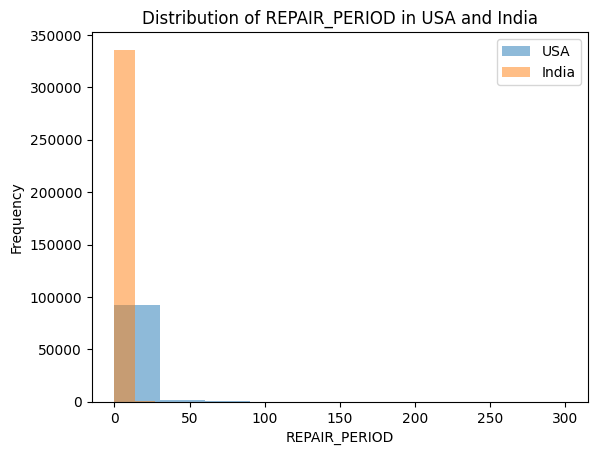

In [28]:
# 히스토그램 그리기
plt.hist(usa_df['REPAIR_PERIOD'], bins=10, alpha=0.5, label='USA')
plt.hist(india_df['REPAIR_PERIOD'], bins=10, alpha=0.5, label='India')

# 그래프 제목 및 레이블 설정
plt.title('Distribution of REPAIR_PERIOD in USA and India')
plt.xlabel('REPAIR_PERIOD')
plt.ylabel('Frequency')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

## 재서비스 기간(이전 서비스와 재서비스 접수 사이의 기간) 비교

In [29]:
display(usa_df['RECLAIM_PERIOD'].describe())
print('미국')
print('***********')
print('인도')
display(india_df['RECLAIM_PERIOD'].describe())

count    94855.00000
mean        23.64024
std         26.57486
min        -89.00000
25%          5.00000
50%         15.00000
75%         40.00000
max         89.00000
Name: RECLAIM_PERIOD, dtype: float64

미국
***********
인도


count    336993.000000
mean         34.507746
std          28.958153
min         -89.000000
25%          10.000000
50%          31.000000
75%          58.000000
max          89.000000
Name: RECLAIM_PERIOD, dtype: float64

In [30]:
print(len(usa_df['ENGINEER_REPAIR'].value_counts()))
usa_df['ENGINEER_REPAIR'].value_counts()

82


ENGINEER_REPAIR
Sealed System Repair                23907
Part replaced-mechanical (ref#)     23078
Part replaced-electrical (ref#)     16402
Customer education                   7119
Adjustment  internal (give ref#)     5007
                                    ...  
LED PKG Exchange                        1
CONNECTOR X4 replacement                1
MSD base replacement                    1
Pipe ass'y Inlet replacement            1
VITM replacement                        1
Name: count, Length: 82, dtype: int64

In [31]:
print(len(india_df['ENGINEER_REPAIR'].value_counts()))
india_df['ENGINEER_REPAIR'].value_counts()

42


ENGINEER_REPAIR
Parts replaced                                   127645
Installation of new product                       48416
Demo given                                        28410
Gas Charging                                      21342
Internal adjustment                               15509
Compressor Replaced                               13599
Wet/Preventive Maintenance                        12070
External adjustment                               12031
Module/Array/Open Cell Replacement                10695
DRY SERVICE                                        9924
Set Found OK                                       6745
Explanation Done                                   6339
Clean set internally                               4858
Clean Filter                                       3773
O/W Estimate given                                 3739
Re-Installation                                    3280
Accessory Sale                                     3059
Drum Replacement                

In [32]:
print(len(usa_df['RECEIPT_SYMPTOM'].value_counts()))
usa_df['RECEIPT_SYMPTOM'].value_counts()

128


RECEIPT_SYMPTOM
Cooling                                 24492
FIX                                      7261
Icemaker                                 7101
Noise                                    5643
Leaking                                  4132
                                        ...  
Troubleshooting - Network Connection        1
(PCC)Error/Display                          1
(PCC)Water Supply                           1
(PCC)Drying                                 1
Inquiry                                     1
Name: count, Length: 128, dtype: int64

In [33]:
print(len(india_df['RECEIPT_SYMPTOM'].value_counts()))
india_df['RECEIPT_SYMPTOM'].value_counts()

151


RECEIPT_SYMPTOM
Power Issues                                                                                                                                                                                                                                 52887
Specification                                                                                                                                                                                                                                44955
Cooling Issues                                                                                                                                                                                                                               35988
How to: Installation and Settings                                                                                                                                                                                                            29769
TS: Temperat

# 직영 외주 비교

In [34]:
cap_df = reserv_df[reserv_df['CAPTIVE_CHANNEL_FLAG'] == 'Captive']
nocap_df = reserv_df[reserv_df['CAPTIVE_CHANNEL_FLAG'] == 'Non Captive']

### 재서비스율 비교

In [35]:
print('직영 재서비스율')
print(len(cap_df)/len(df[df['CAPTIVE_CHANNEL_FLAG']=='Captive']))

print('외주 재서비스율')
print(len(nocap_df)/len(df[df['CAPTIVE_CHANNEL_FLAG']=='Non Captive']))

직영 재서비스율
0.03190834850788334
외주 재서비스율
0.029656446872086833


### 수리기간 비교

In [36]:
display(cap_df['REPAIR_PERIOD'].describe())
print('********************************************')

display(nocap_df['REPAIR_PERIOD'].describe())

count    285922.000000
mean          0.288421
std           2.036477
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         135.000000
Name: REPAIR_PERIOD, dtype: float64

********************************************


count    145926.000000
mean          2.119951
std           8.488734
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         300.000000
Name: REPAIR_PERIOD, dtype: float64

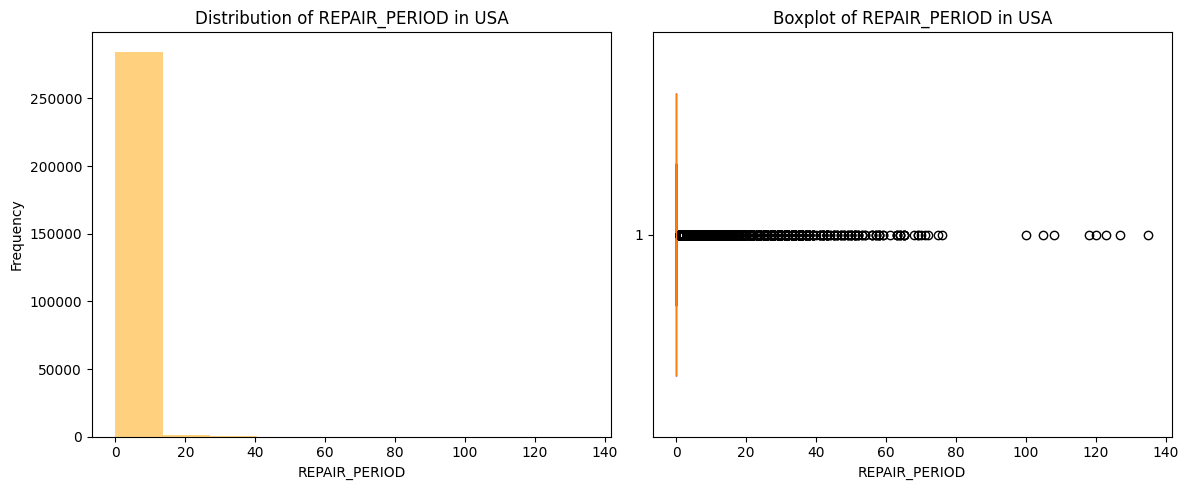

In [38]:
#직영

# Figure 및 Axes 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 서브플롯: 히스토그램
axes[0].hist(cap_df['REPAIR_PERIOD'], bins=10, alpha=0.5, color='orange')
axes[0].set_title('Distribution of REPAIR_PERIOD in USA')
axes[0].set_xlabel('REPAIR_PERIOD')
axes[0].set_ylabel('Frequency')

# 두 번째 서브플롯: 박스플롯
axes[1].boxplot(cap_df['REPAIR_PERIOD'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
axes[1].set_title('Boxplot of REPAIR_PERIOD in USA')
axes[1].set_xlabel('REPAIR_PERIOD')

# 서브플롯 간의 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

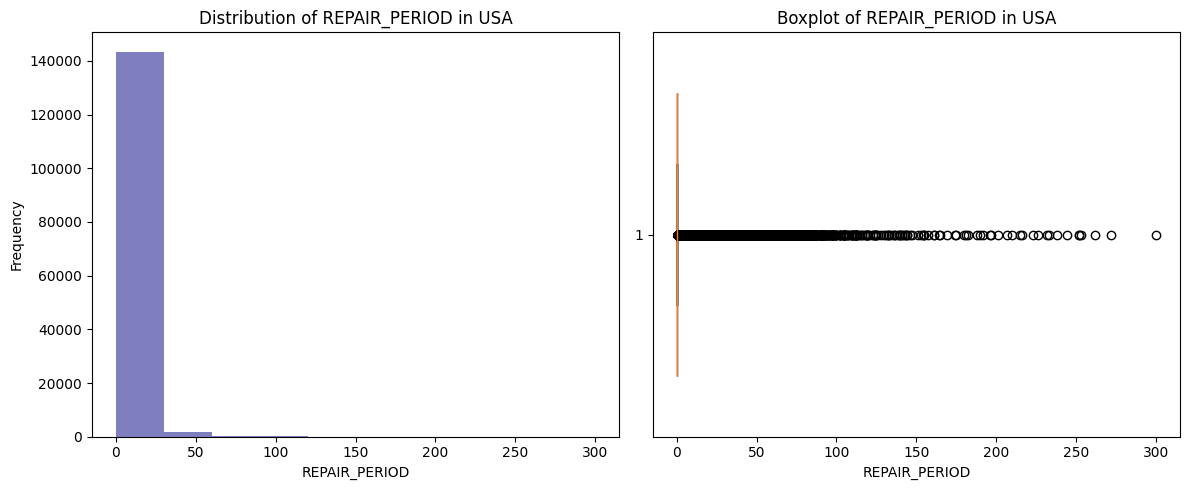

In [39]:
# Figure 및 Axes 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 서브플롯: 히스토그램
axes[0].hist(nocap_df['REPAIR_PERIOD'], bins=10, alpha=0.5, color='navy')
axes[0].set_title('Distribution of REPAIR_PERIOD in USA')
axes[0].set_xlabel('REPAIR_PERIOD')
axes[0].set_ylabel('Frequency')

# 두 번째 서브플롯: 박스플롯
axes[1].boxplot(nocap_df['REPAIR_PERIOD'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='navy', color='navy'))
axes[1].set_title('Boxplot of REPAIR_PERIOD in USA')
axes[1].set_xlabel('REPAIR_PERIOD')

# 서브플롯 간의 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()

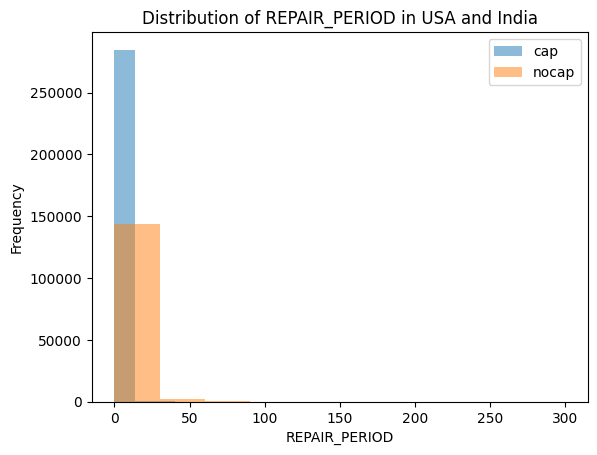

In [42]:
# 히스토그램 그리기
plt.hist(cap_df['REPAIR_PERIOD'], bins=10, alpha=0.5, label='cap')
plt.hist(nocap_df['REPAIR_PERIOD'], bins=10, alpha=0.5, label='nocap')

# 그래프 제목 및 레이블 설정
plt.title('Distribution of REPAIR_PERIOD in USA and India')
plt.xlabel('REPAIR_PERIOD')
plt.ylabel('Frequency')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

## 재서비스 기간(이전 서비스와 재서비스 접수 사이의 기간) 비교

In [43]:
display(cap_df['RECLAIM_PERIOD'].describe())
print('직영')
print('***********')
print('외주')
display(nocap_df['RECLAIM_PERIOD'].describe())

count    285922.000000
mean         33.602997
std          27.883205
min         -89.000000
25%           9.000000
50%          29.000000
75%          56.000000
max          89.000000
Name: RECLAIM_PERIOD, dtype: float64

직영
***********
외주


count    145926.000000
mean         29.216370
std          30.322123
min         -89.000000
25%           6.000000
50%          24.000000
75%          53.000000
max          89.000000
Name: RECLAIM_PERIOD, dtype: float64